In [1]:
import os
import subprocess
from PIL import Image

dir0 = 'jpeg' 
dir1 = 'jpeg2png'
dir2 = 'png_resize'

files0 = os.listdir(dir0)
files0.sort()

for file in files0:

    if '.jpeg'  in file:        
        command = 'sips --setProperty format png ' + dir0 +'/' + file +  ' --out ' + dir1 +'/' +  file.replace('.jpeg','.png') 
        subprocess.call(command, shell=True)
        print(file) 

files1 = os.listdir(dir1)
files1.sort()
print('')

for file in files1:
    
    if '.png' in file:   
        img0 = os.path.join(dir1, file)
        img0_img = Image.open(img0)
        img1_img = img0_img.resize((300,300)) 
        img1 = os.path.join(dir2, file) 
        img1_img.save(img1)
        print(file)
    

IMG_9814.HEIC
IMG_9815.HEIC
IMG_9816.HEIC
IMG_9817.HEIC
IMG_9837.HEIC
IMG_9838.HEIC
IMG_9839.HEIC

IMG_9814.png
IMG_9815.png
IMG_9816.png
IMG_9817.png
IMG_9837.png
IMG_9838.png
IMG_9839.png


IMG_9814.png : 55
IMG_9815.png : 76
IMG_9816.png : 65
IMG_9817.png : 58
IMG_9837.png : 0
IMG_9838.png : 0
IMG_9839.png : 0


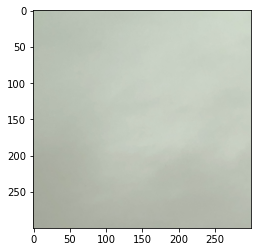

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

image_data2 = []
dir2 = 'png_resize'
files2 = os.listdir(dir2)
files2.sort()

for file in files2:
    if '.png'  in file:        
        img = cv2.imread('./png_resize/' + file)
        plt.imshow(img)
        h, w, c = img.shape    

        v_split = 28
        h_split = 28
        _img = img[:h // v_split * v_split, :w // h_split * h_split]

        image_data =[]

        for h_img in np.vsplit(_img, v_split):
            for v_img in np.hsplit(h_img, h_split):  
                b, g, r = cv2.split(v_img)
                value = round(b.mean())/100
                if value > 1.6:
                    value2 = 0
                else:
                    value2 = 1
                image_data.append(value2)

        score = round(sum(image_data)*100/(28*28))
        image_data2.append(score)   
        
        print(file+' : '+str(round(sum(image_data)*100/(28*28))))   
